### Objective: Develop an End-to-End ML project and deploy it to Heroku with Flask

# Predicting Fuel Efficiency of Vehicles

### Steps:
1. **Data Collection** - We are using the classis [Auto MPG Dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) from UCI ML Repository.
2. **Define Problem Statement** - We will frame the problem based on the dataset description and initial exploration.
3. **EDA** - Carry out exploratory analysis to finguew out the important features and creating new combination of features.
4. **Data Preparation** - Using step 4, create a pipeline of tasks to transform the data to be loaded into out ML models.
5. **Selecting and Training ML models** - Training a few models to evaluate their predictions using cross-validation.
6. **Hyperparameter tuning** - Fine tune the hyperparameters for the models that show promising results.
7. **Deploy the Model using a web service** - Using Flask web framework to deploy the model on Heroku.




### Step 1: Collecting Data from UCI ML repository
Use wget or directly download the dataset.

In [27]:
# This work with linux, ! sigh means trying to run a shell command from jupyter
# !wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

### Step 2: Defining the problem statement

In [28]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Importing the dataset

# Defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
        'Acceleration','Model Year','Origin']

# Loading the dataset into a dataframe
df = pd.read_csv('auto-mpg.data',names=cols, na_values='?',
                 comment='\t',sep=' ',skipinitialspace=True)

# Making a copy of this dataframe
data = df.copy()

# Displaying the data
#df
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multi-values discrete and 5 continuous attributes.


#### Attribute Information
1. MPG: Continuous, stands for Mile per Gallon.
2. Cylinders: Multi-values discrete. This is a categorical variable. 
3. Displacement: Continuous
4. Horsepower: Continuous
5. Weight: Continuous
6. Acceleration: Continuous
7. Model Year: Multi-values discrete
8. Origin: Multi-values discrete, country code



### Problem Statement

Miles per Gallon (MPG) is a measure of the efficiency of the vehicle. It tells us the amount of fuel consumption by vehicles in 1970s and 1980s.

Out aim is to predict the MPG value of a vehicle, given that we have other attributes of that vehicle.


**Supervised Machine Learning Regression Problem.**

### Step 3. Exploratory Data Analysis
1. Check for Data types of columns
2. Check for null values
3. Check for outliers
4. Look for the category distribution in categorical columns
5. Plot for correlation
6. Look for new variables

For this dataset these 6 steps need to be performed, for a different more complex dataset, more steps can be performed accordingly.

In [30]:
# Check data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


Note that the categorical multi-value discrete variables have int data type. There are no string data types present.

So we don't have to anything related to formatting of data types, as all are numeric and no strings or objects are present.

Also there are null values.

In [31]:
# Checking how many null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Only horsepower column has null values. There are 6 null values in total. And horsepower is a continuous variables

We can fill these null values by some other value.

In [32]:
# Summary statistics of quantitaive variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: xlabel='Horsepower'>

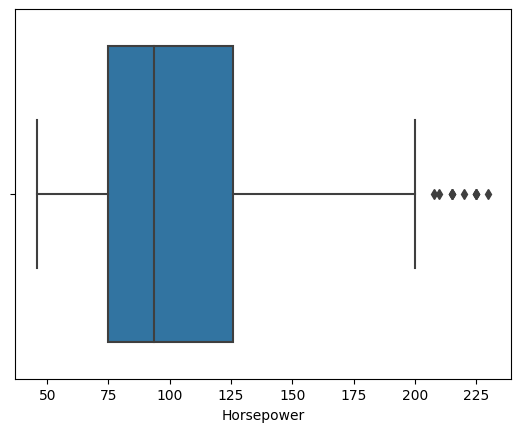

In [33]:
# From above it is clear, Horspower column has a skewed distribution
# Looking for outliers in the column
sns.boxplot(x=data['Horsepower'])

Note that there are outliers present in the column. But the outliers are very few in number. So we, can use median to impute the missing values using pandas median method.

Because, mean value is more sensitive to outliers.

In [34]:
# Filling null values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


Now as no null values remain. We now look at the categorical columns.

Looking for the category distributions in category columns.
There are 2 category columns:
1. Cylinders
2. Origins

In [35]:
# Category distribution 
data['Cylinders'].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [36]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In the data, the distribution is not same for all categories.

#### Plots for correlation

Two plots are useful in this, heatmap and pairplots

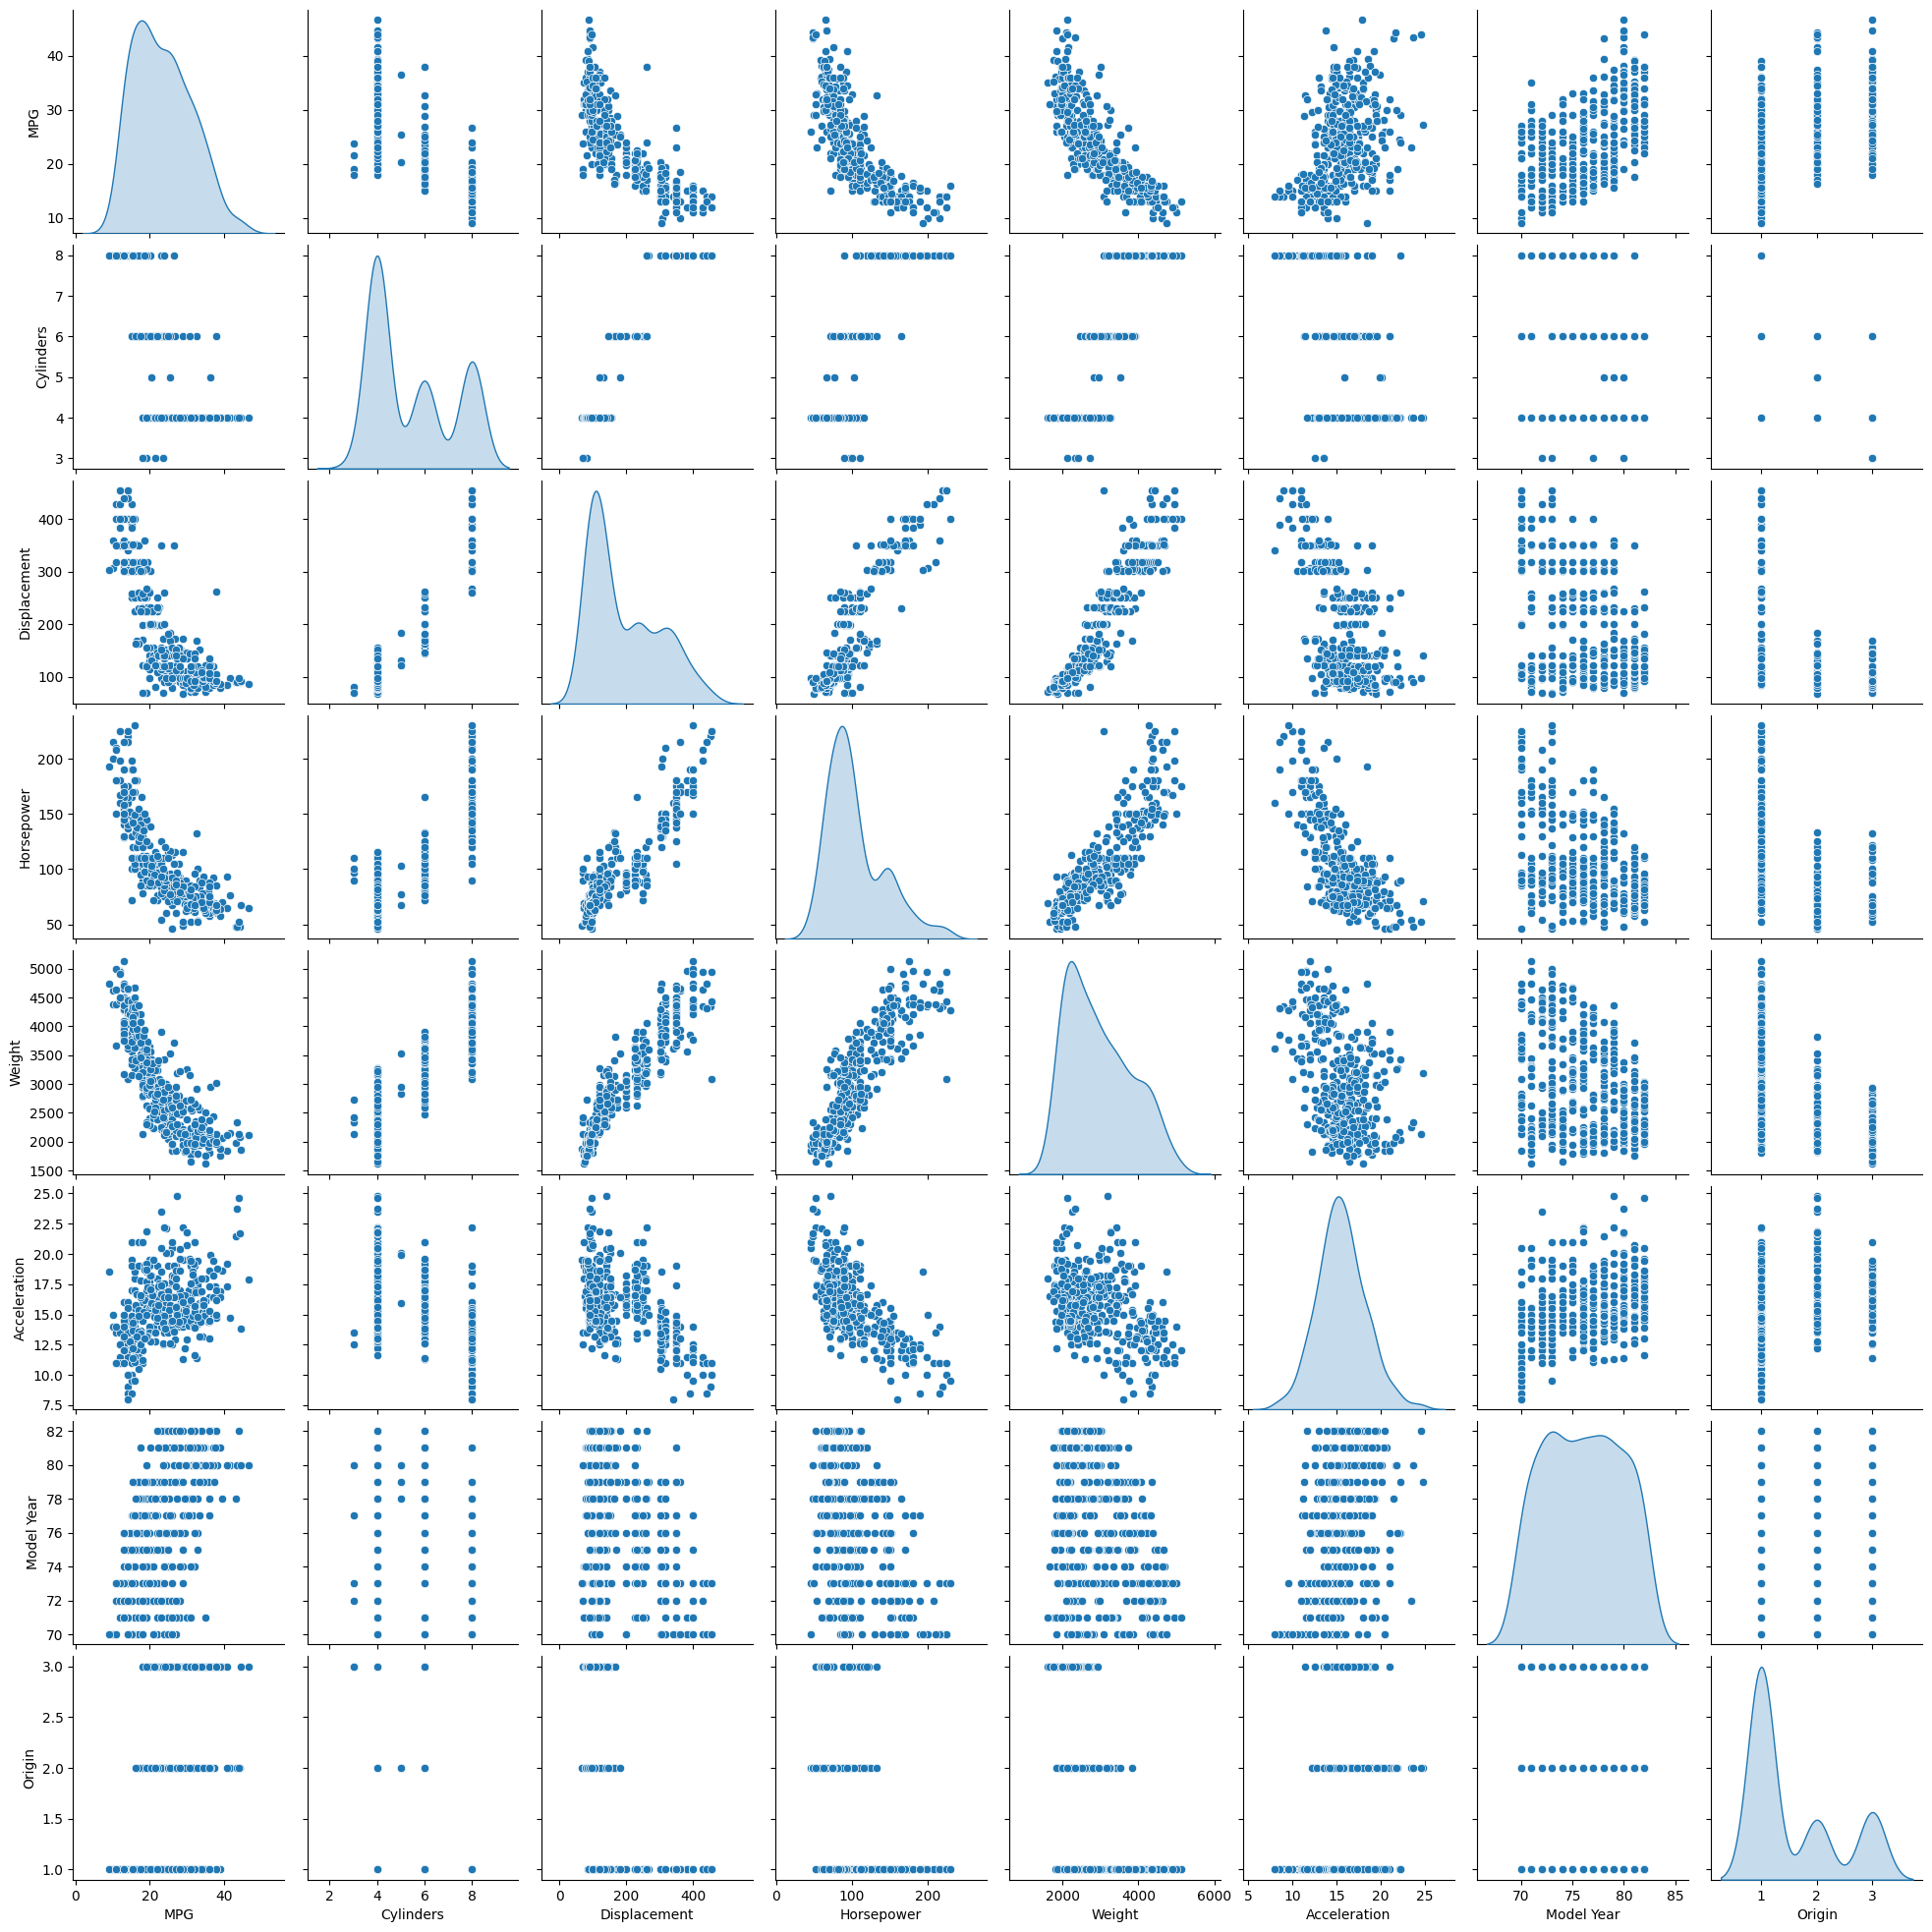

In [37]:
# pairplot to get intuition of potential correlation

sns.pairplot(data, diag_kind='kde')

<Axes: >

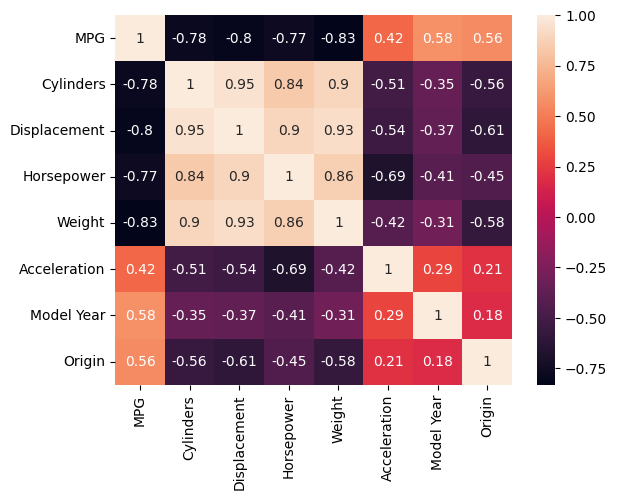

In [38]:
sns.heatmap(data.corr(),annot=True)

Pairplot gives us a brief overview of how each variable behaves with respoect to every other variable.

For example MPG column is negatively correlated with displacement, weight and horsepower features. This is also confirmed by the correlation heatmap.

Also note that displacement is positively correlated with weight and horsepower.

#### Splitting the data into test-train sets

This is one of first things we need to do, as we want to test out final model on unseen/unbiased data.

Many ways to split the data. But we want our test set to represent overall population and not just a few specified categories. Thus, instead of simple and common train_test_split() method from sklear, we use stratified sampling.

Stratified sampling creates a homogenous subgroups called strata from the overall population and sample the right number of instances to each stratum to ensure that the test set is representatitve of the overall population.

From Cylinders and Origin columns we pick Cylinders column to create the strata.

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['Cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
print(round(len(strat_test_set)/len(data),4))

0.201


In [40]:
# Checking for the cylinder catergory distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [41]:
# cylinder catergory distribution in test set
strat_test_set['Cylinders'].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [42]:
train_set, test_set = strat_train_set, strat_test_set

#### Checking the Origin column

The Origin column values look like code for a country. To add complication, and to make it more explicit, I will convert these numbers to strings

In [43]:
# Converting integer classes to countries in Origin column

train_set['Origin'] = train_set['Origin'].map({1:'India', 2:'USA', 3:'Germany'})
train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
274,20.3,5,131.0,103.0,2830.0,15.9,78,USA
276,21.6,4,121.0,115.0,2795.0,15.7,78,USA
92,13.0,8,351.0,158.0,4363.0,13.0,73,India
338,27.2,4,135.0,84.0,2490.0,15.7,81,India
247,39.4,4,85.0,70.0,2070.0,18.6,78,Germany
349,34.1,4,91.0,68.0,1985.0,16.0,81,Germany
395,32.0,4,135.0,84.0,2295.0,11.6,82,India
68,13.0,8,350.0,155.0,4502.0,13.5,72,India
138,14.0,8,318.0,150.0,4457.0,13.5,74,India
117,29.0,4,68.0,49.0,1867.0,19.5,73,USA


We will preprocess this Orgin column categories by one-hot-encoding these values.

In [44]:
# One hot encoding
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


#### Testing for new variables: Feature engineering

Analyze the correlation of each variable with the target variable.

In [45]:
# Testing new variables by checking their correlation wrt MPG

data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

We found acceleration_on_power and acceleration_on_cyl as two new variables which turned out to be more positively correlated tha the original variables.

This bring the end of EDA, we can now move to the next step of preparing the data for machine learning.